## Priors

Bayes' Rule gives us a method to update our beleifs based on prior knowledge.  In words, this looks like:

$posterior = \frac{likelihood \ast prior}{marginal}$

Which can also be stated as:

$posterior = \frac{likelihood \ast prior}{evidence}$

Or, being explicit about data $\mathcal{D}$ and parameters $\theta$, we might write it as:

$p(\theta|\mathcal{D}) = \frac{p(\mathcal{D}|\theta) \ast p(\theta)}{p(\mathcal{D})}$

This is a change in frame of reference with respect to variable data and fixed parameters which is the hallmark of Bayesian thinking.  After you observe the data, it is fixed.  This session we will talk about priors, how to think about the prior and what influence it has on the posterior.

General references:
  
+ Pattern Recognition and Machine Learning (9780387310732) Bishop, Christopher M.
+ Statistical Inference (9780534243128): Casella, George, Berger, Roger L.  
+ Probability Theory and Statistical Inference: Empirical Modeling with Observational Data (9781107185142): Spanos, A.  
+ Bayesian Models: A Statistical Primer for Ecologists (9780691159287): Hobbs, N. Thompson, Hooten, Mevin B.  
+ A First Course in Bayesian Statistical Methods (0387922997): Hoff, Peter D.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Prior * Likelihood

In learning about Bayes' Rule, we saw how our prior information about the occurance of an event is updated through the conditional probability of an event.  We are now considering the case where both the conditional probability of data|parameters and the prior are distributions (including possibly the uniform).  


As related to Bayes' Rule, the prior is the unconditional probability of the parameters before (new) data.  Priors can come from a number of sources including

+ past experiments or experience   
+ some sort of desire for balance or weighting in a decision   
+ non-informative, but objective   
+ mathmatical convenience   

Choice of the prior is as much about what is currently known about the parameters as it is about the goal of the analysis.  This makes the choice of prior subjective and often contested.  How do we choose priors?  Two broad categories could include:
 
* noninformative
* informative 

The priors can also be **proper**, ie conform to the rules of probability and integrate to 1, or **improper**.  As an example, consider the uniform distribution as a prior to the mean in a normal distribution, we want to apply equal weights to all possiblle values of $\mu$.  However, $\mu \in [-\infty,\infty]$ and our uniform prior must span the same range. Jeffrey's prior is another example of an (often) improper prior discussed below. 

The form of the prior is also a choice.  Convenient choices of priors can lead to closed form solutions for the posterior.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

#### Conjugate priors

Conjugate priors are priors that induce a known distribution in the posterior.  When computing the posterior probability, if we have a justifiable reason for using pairing the likelihood which a conjugate prior, we will find the posterior probabality is a known distribution.  For example, consider

$X \sim Bern(\theta)$

The likelihood takes the form:

$f(x|\theta) = \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} = \theta^{k}(1-\theta)^{n-k}$, where $k=\sum x_i$,shifting our focus from x, to $\theta$, if $\theta$ were the random variable, it appears to have the functional kernel of the distribution of a beta.  If we assume the prior take the form of a beta distribution (dropping all the constants):

$f(x|\theta) \ast p(\theta) \propto \theta^{k}(1-\theta)^{n-k} \ast \theta^{\alpha-1}(1-\theta)^{\beta-1} = \theta^{\alpha+k-1}(1-\theta)^{\beta+n-k-1}$

Which we recognize as $Beta(\alpha+k,\beta+n-k)$ in $\theta$.  

IF, we are modelling a Bernoulli process and use a prior with a Beta distribution, our posterior has a known distribution with parameters as shown.

Common conjugate priors by likelihood type:  
likelihood - prior   
Binomial - beta  
Poisson - Gamma  
Normal (known $\sigma^2$) - Normal  
Normal (known $\mu$) - inverse-gamma  
Multivariate normal (known $\Sigma$) - inverse-Wishart  

<br>
<br>
<hr style="border:2px solid blue"> </hr>


#### Noninformative priors

Noninformative priors are priors that suggest ignorance as to the parameters.  These are sometimes called vague or diffuse priors.  The priors generally cover the region of the parameter space relatively smoothly.  Common noninformative priors include $unif(-1000,1000)$, $N(0,10,000)$.  Note that seeminly vague priors can actually be strongly informative.  Consider the case of modeling a binary model for y following a Bernoulli distribution.  A common modeling technique would be to transform the problem using the logit function.  For instance:

$y \sim Bern(p)$  
$p=logit^{-1}(\beta_0 + \beta_1)$

Placing priors $[\beta_0,\beta_1] \sim N(0,100)$ places undue weight on 0 through the transform while using a weakly informative prior $[\beta_0,\beta_1] \sim N(0,2^2)$ gives a more diffuse effect on the parameter posterior.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

#### Jeffrey's non-informative prior

The Jeffrey's prior is a non-informative prior that is derived from the Fisher information.  This prior is non-informative in that we do not specify prior information, but it is informative in that we use the data to information to shape the prior.  Specifically, the Fisher's information tells us how much information about $\theta$ is included in the data.  Formally, the Jeffrey's prior is derived by:

$p(\theta) \propto \sqrt{I_n(\theta)}$, where

$I_n(\theta) = E_{\theta}\big\{\big(\frac{\partial ln f(\theta)}{\partial \theta}\big)\big\} = -E_{\theta}\big\{\big(\frac{\partial^2 ln L(\theta)}{\partial \theta^2}\big)\big\}$

This is a $pxp$ matrix of partial derivatives when there are p parameters.

Working through an example, let 

$X \sim gamma(\alpha,\beta)$, assuming $\alpha$ is known and $\beta$ is unknown.  Through the likelihood, one can work out the Fisher's information to be

$I_n(\beta) = \frac{n\alpha}{\beta^2}$ leading to the Jeffrey's prior for $\beta$:

$p(\beta) \propto \sqrt{\frac{n\alpha}{\beta^2}} \propto 1$

Note that Jeffrey's priors are not guaranteed to be proper.  Perhaps most importantly, Jeffrey's priors are stable under reparameterization.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

#### Informative priors

Informative priors are explicitly chosen to represent current knowledge or belief about the parameters of interest.  When choosing informative priors, one can also choose the form of the prior.  As an example, suppose we are back at tossing coins.  We were given a new coin from a friend and were told it would generate heads with P(heads) = 0.75.  We conduct a new experiment to characterize the distribution of $\theta$.  We will see that a computationally convenient distribution on the prior is a beta(a,b) when dealing with Bernoulli trials.  What do we choose for paramters the beta distribution?  To incorporate the information we have, we might choose a beta having a mean close to 0.75 to represent the information given to us.  We also have the ability to choose the precision/scale.  We can tune that to represent some amount of disbelief in the un-fairness of the coin.  Looking at the plots below, we could use the beta(6.9,3) or beta(16,6) distribution as examples.  These were chosen empirically through plotting and calculating the mean and modes.

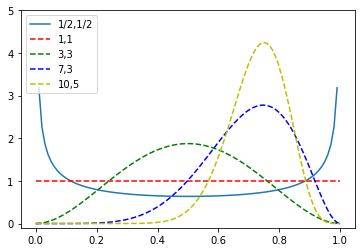

In [58]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)

y1 = beta.pdf(x, 0.5, 0.5)
y2 = beta.pdf(x, 1, 1)
y3 = beta.pdf(x, 3, 3)
y4 = beta.pdf(x, 6.9, 3)
y5 = beta.pdf(x, 16, 6)
plt.plot(x, y1, "-", label="1/2,1/2")
plt.plot(x, y2, "r--",label="1,1")
plt.plot(x, y3, "g--",label="3,3")
plt.plot(x, y4, "b--",label="6.9,3")
plt.plot(x, y5, "y--",label="16,6")
plt.legend(loc="upper left")
plt.ylim(-0.1, 5.0)
plt.show()

#### Weakly informative or vague priors

In the plots above, we see that we can tune our prior belief using the mean or even mode to center our beleif and variance as a measure of our strength of belief.  For the beta,(6.9,3) this may look like:
    
$E[x] = \frac{a}{a+b} = 0.70$  
$mode(x) = \frac{a-1}{(a+b-2)} = 0.77$  
$Var(x) = \frac{ab}{(a+b)^2(a+b+1)} = 0.05$  

Tuning the prior to include slightly more confidence in the prior information may suggest a beta(16,6) which reduces the variance to 0.028.  These priors are vague in that the mass of the prior is still diffuse allowing the data to drive the posterior through the likelihood.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Senstivity analysis of priors

The general approach to using priors in models is to start with some justification for a prior, run the analysis, then come up with competing priors and reexamine the conclusions under the alternative priors.  The results of the final model and the analysis of the sensitivity of the analysis to the choice of prior are written up as a package.  

For a discussion of steps and methods to use in a sensitivity analysis, see:
Bayesian Data Analysis by Andrew Gelman, John Carlin, Hal Stern, David Dunson, Aki Vehtari, and Donald Rubin.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Likelihood * prior

What we have been talking about is priors and thier influence on the likelihood in development of the posterior.  A few examples should help.  

<br>
<br>
<hr style="border:2px solid blue"> </hr>

#### Example binomial-beta

Let us first consider the coin toss experiment above, as a reminder, we are given a presumable unfair coin with p(heads)=0.75.  Let us collect new data and analyze the posterior.  First, we are going to collect a series of tosses, so the likelihood is best given by a binomial distribution.  Examining the likelihood from the perspective of the parameter, $\theta$, we note both that the functional form of the likelihood appears to be that of a beta and the support of a beta, [0,1], vs the valid values of $\theta$ match.  

$p(\theta|x) = f(x|\theta) \ast p(\theta) \propto \big [{n \choose x} \theta^x (1-\theta)^{n-x} \big ] \ast \big [\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \big ]$

Simplifying a bit, we get:

$p(\theta|x) \propto \theta^{\alpha+x-1} (1-\theta)^{\beta+n-x-1}$

Following along the discussion above, we note that the things we have that are tunable (hyperparameters), are $\alpha$ and $\beta$.  Here, we are using the value of $\theta$, but do to what extent do we believe the friend who gave us the coin and the tip?  Let us simulate three scenarios: a) we don't believe the friend at all, b) we give some credience to the friend and c) we are strong in our trust.  We will represent these scenarios using beta(1,1), beta(6.9,3),beta(16,6).  Note that we know what the final distribution is, it is a beta($\alpha$+x, $\beta$+n-x).  We could simply compute the mean, variance etc.  Instead, let's visuallize the outcomes.  Assume first, we tossed 10 coins and observed 7 heads.


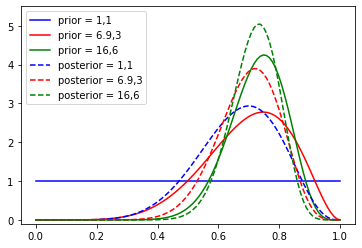

In [70]:
### assume the coin is as advertized, could have drew from rbinom(p=0.75)
x = np.linspace(0, 1, 100)
n = 10
k = 7 #used x

p1 = beta.pdf(x, 1, 1)
p2 = beta.pdf(x, 6.9, 3)
p3 = beta.pdf(x, 16, 6)
y1 = beta.pdf(x, k+1, 1+n-k)
y2 = beta.pdf(x, k+6.9, 3+n-k)
y3 = beta.pdf(x, k+16, 6+n-k)
plt.plot(x, p1, "b-", label="prior = 1,1")
plt.plot(x, p2, "r-", label="prior = 6.9,3")
plt.plot(x, p3, "g-", label="prior = 16,6")

plt.plot(x, y1, "b--", label="posterior = 1,1")
plt.plot(x, y2, "r--", label="posterior = 6.9,3")
plt.plot(x, y3, "g--", label="posterior = 16,6")
plt.legend(loc="upper left")
plt.ylim(-0.1, 5.5)
plt.show()

## note the distributions all pull towards the likelihood, irrespective of how informative the prior was

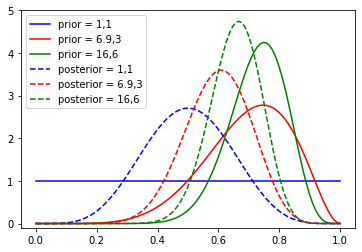

In [64]:
### assume the coin is perfectly fair, could have drew from rbinom(p=0.5)
x = np.linspace(0, 1, 100)
n = 10
k = 5 #used x

p1 = beta.pdf(x, 1, 1)
p2 = beta.pdf(x, 6.9, 3)
p3 = beta.pdf(x, 16, 6)
y1 = beta.pdf(x, k+1, 1+n-k)
y2 = beta.pdf(x, k+6.9, 3+n-k)
y3 = beta.pdf(x, k+16, 6+n-k)
plt.plot(x, p1, "b-", label="prior = 1,1")
plt.plot(x, p2, "r-", label="prior = 6.9,3")
plt.plot(x, p3, "g-", label="prior = 16,6")

plt.plot(x, y1, "b--", label="posterior = 1,1")
plt.plot(x, y2, "r--", label="posterior = 6.9,3")
plt.plot(x, y3, "g--", label="posterior = 16,6")
plt.legend(loc="upper left")
plt.ylim(-0.1, 5.0)
plt.show()

## again, the likelihood pulls the posterior distribution towards the theta supported by the data

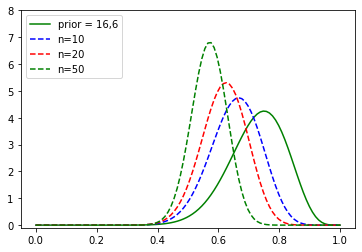

In [69]:
### assume the coin is perfectly fair, could have drew from rbinom(p=0.5)
### BUT, we trusted our friend, what does the size of the experiment do to our posterior
x = np.linspace(0, 1, 100)
n1 = 10
n2 = 20
n3 = 50
k1 = 5 
k2 = 10
k3 = 25

p1 = beta.pdf(x, 1, 1)
p2 = beta.pdf(x, 6.9, 3)
p3 = beta.pdf(x, 16, 6)
y1 = beta.pdf(x, k1+16, 6+n1-k1)
y2 = beta.pdf(x, k2+16, 6+n2-k2)
y3 = beta.pdf(x, k3+16, 6+n3-k3)
#plt.plot(x, p1, "b-", label="prior = 1,1")
#plt.plot(x, p2, "r-",label="prior = 6.9,3")
plt.plot(x, p3, "g-",label="prior = 16,6")

plt.plot(x, y1, "b--", label="n=10")
plt.plot(x, y2, "r--", label="n=20")
plt.plot(x, y3, "g--", label="n=50")
plt.legend(loc="upper left")
plt.ylim(-0.1, 8.0)
plt.show()

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### UNGRADED EVALUATION (15 min)

#### 1.  

Given a $y \sim Poisson(\lambda)$ and $p(\lambda) \sim gamma(a,b)$, what is the mean of the posterior? $\bar{y}$ = mean 

    a- a + n$\bar{y}$ (C)  
    b- a + $\bar{y}$


#### 2.  

You are given a data set containing the average weight of male flies and decide to model the average weight via a normal distribution.  You don't know what to expect in terms of mean, but expect a previous study of female flies to be informative about the variance ($\sigma_f^2$).  Using conjugates, your model will be (likelihood $\ast$ prior):

a- $N(\mu,\sigma^2) \ast N(\mu_0,\sigma_f^2)$  
b- $N(\mu,\sigma_f^2) \ast N(\mu_0,\sigma_0^2)$ (C)  
c- $N(\mu,\sigma^2) \ast N(\mu,\sigma_0^2)$




### GRADED EVALUATION (30 mins)

1. For a variable $X \sim N(\mu,\sigma^2)$ where $\sigma^2$ is fixed and known, find the Jeffrey's prior. Is it proper?


a- $p(\mu) \propto \sqrt{\frac{1}{\sigma^2}} \propto 1$ ; proper (C) 

b- $p(\mu) \propto \sqrt{\frac{1}{\sigma^2}} \propto 1$ ; improper  

c- $p(\mu) \propto \sqrt{\frac{1}{\sigma^2}} \propto \frac{1}{\sigma^2}$ ; proper

2. We are studing a Bernoulli process for which we have no prior information.  We decide to use a non-informative prior such as the beta(1,1).  Because the prior is flat [0,1], this prior will have no effect on the posterior.

a- true  
b- false  (C) . 


3. The data we are modelling comes from a geometric distribution.  A good choice of prior family is:


a- exponential; because there is only one parameter   
b- beta; because the for of the exponential matches the kernel of the beta (C)  
c- uniform; due to the parameter of the exponential being a proportion 

4. Given a prior having mean 10 and data having mean 5, we should expect the posterior mean to lie

a- to the right of 5 . 
b- to the left of 10  
c- between 5 and 10 (C) . 